# Histograms and Density

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

## 一維的直方圖

* 一個簡單的直方圖，就用 `plt.hist()` 就可以完成：

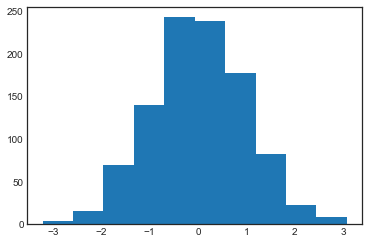

In [2]:
data = np.random.randn(1000)
plt.hist(data);

* 我們還有很多客製化的參數可以下：

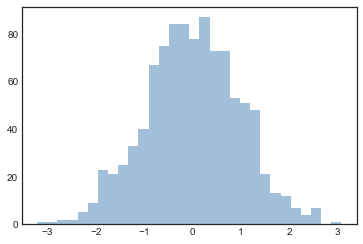

In [3]:
plt.hist(data, 
         bins=30, 
         color='steelblue',
         edgecolor='none',
         histtype='stepfilled', 
         alpha=0.5);

* 如果想得到分類後的數據就好，那可以這樣做

In [4]:
counts, bin_edges = np.histogram(data, bins=5)
print(bin_edges) # 每個bin的起點終點
print(counts) # 每個 bin 對應到的次數

[-3.21645951 -1.95720546 -0.69795141  0.56130263  1.82055668  3.07981073]
[ 20 209 481 259  31]


* 如果要同時畫多個 histogram，那就多做幾次 `plt.hist()` 就好:

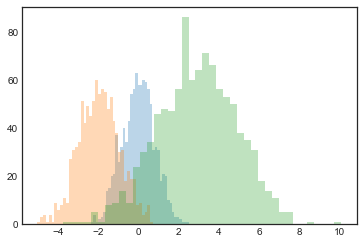

In [5]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

## 二維的直方圖

In [6]:
# 生出二維常態的資料
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### ``plt.hist2d``: 二維直方圖

* 剛剛一維的 histogram，是用 `plt.hist()` 來畫，現在二維的 histogram，是用 `plt.hist2d()` 來畫. 

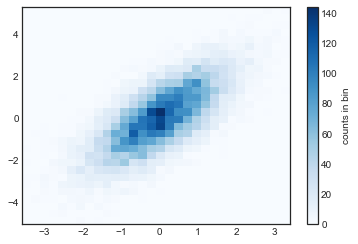

In [7]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

* 就像剛剛可以用 `np.histogram()` 來得到組別和各組的count的訊息，現在可以用 `np.histogram2d()` 來得到各組的組別(就是x和y的range)以及組別的count。作法如下：

In [8]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

In [9]:
print(counts)
print(xedges)
print(yedges)

[[  0.   0.   0.   0.   0.   1.   1.   0.   1.   0.   1.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   2.   0.   0.   1.   0.   0.   0.   0.   0.   1.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   1.   2.   3.   4.   1.   0.   1.   1.   1.   1.   1.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   1.   0.   1.   1.   1.   2.   2.   4.   0.   1.   2.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   2.   3.   0.   4.   7.   1.   4.   6.   3.   4.   5.   1.   1.
    0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   1.   3.   4.   8.   8.  13.   6.   9.   9.   8.   1.   1.
    1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  2.   0.   5.   4.   3.  10.   9.  21.   9.  12.  15.  

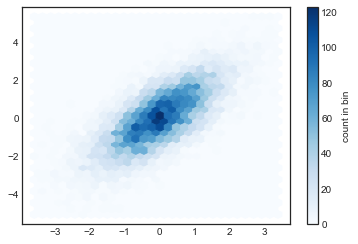

In [10]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

### Kernel density estimation

* 我們也可以去估計二維分配的 density，例如，我假設資料服從二維常態，然後去估計他
* 我們可以用 `scipy.stats` 這個 module

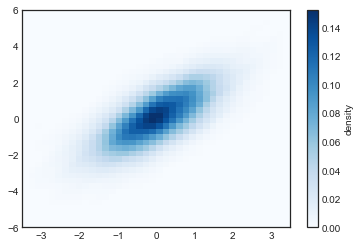

In [11]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

* 之後在 [深入研究: 核密度估計]()的章節，會介紹 kernel density的估計方法。  
* 後面的 [使用seaborn]()進行視覺化，也會介紹seaborn更簡潔的語法，做到更客製化的繪圖。